# Assignment 12
## name : rocky kim 
## student id : 20152424
## github link :[https://github.com/Epicevent/assignment12](https://github.com/Epicevent/assignment12 ) 

# x  : x-coordinate data
# y : (noisy) y-coordinate data

$$
    y  =  |x| \sin(x) + noisevalue
$$

# Make Noisy Data by given code and Plot noisy

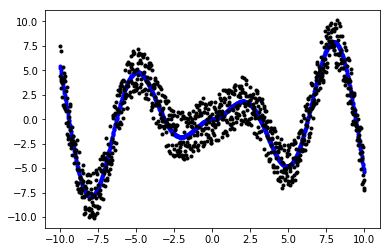

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

num     = 1001
std     = 5 

# x  : x-coordinate data
# y_origin : (original) y-coordinate data 
# y : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y_origin      = fun(x) 			# original points
y      = y_origin + nn * std		# noisy points

plt.plot(x, y_origin, 'b.', x, y, 'k.')
plt.show()

# Mathematic model for polynomial fitting with degree p



# definition of colunm vector $a_i$


$$
     a_i=
  \left[ {\begin{array}{ccccc}
   (x_1)^i \\
   (x_2)^i \\
   \vdots \\
   (x_n)^i 
  \end{array} } \right]
$$




# definition of p-degree Matrix


$$
   A_p=
  \left[ {\begin{array}{ccccc}
   a_0 & a_1 & \dots & a_p 
  \end{array} } \right]
$$
  
$$
  b=  \left[ {\begin{array}{ccccc}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n 
  \end{array} } \right]
$$



# model parameter 

$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta_0 \\
  \theta_1 \\  
  \vdots \\
  \theta_p
  \end{array} } \right] 
$$




# make Least Square problem We want to minimize 

$$ 
\| A\theta - b   \|^2 + \lambda \|\theta\|^2= \sum_{j=1}^{n}{r_j^2} +\lambda \sum_{i=0}^{p}{(\theta_i)^2}\quad where, \quad r_j = y_j -\tilde{f}(x_j)
$$



$$
    \tilde{f}(x) = \theta_0x^0 + \theta_1x^1 + · · · + \theta_px^p   
$$


$$
    A_p \theta = 
   \left[ {\begin{array}{ccccc}
  \tilde{f}(x_0) \\
   \tilde{f}(x_1) \\  
  \vdots \\
    \tilde{f}(x_n)
  \end{array} } \right]
$$


$$
\sqrt{\lambda} I \theta =    \left[ {\begin{array}{ccccc}
  \sqrt{\lambda}\theta_0 \\
  \sqrt{\lambda}\theta_1 \\
  \vdots \\
   \sqrt{\lambda}\theta_p 
  \end{array} } \right]
$$

In [22]:
pset = np.array([0,1,2,3,4,5,6,7,8,9]) # set all test case of  polynomial degree 

def makeA_p( p,x):
    num = np.shape(x)[0]
    a0 = np.ones(num) # first column of A
    if p==0:
        numdata = np.shape(a0)[0]
        a0 = a0.reshape((numdata, 1))
    for i in range(1,p+1):
        x_i =x**i
        a0 = np.column_stack((a0,x_i))
    A= a0
    return A

def make_sqrt_lambda(p,lamb_da):
    return np.sqrt(lamb_da)*np.eye(p+1)

# definition of the least square probel

$$
A = \left[ {\begin{array}{ccccc}
A_p \\
\sqrt(\lambda)I
\end{array}} \right]
$$


$$
\mathbb{b} = \left[ {\begin{array}{ccccc}
b\\
0\in\mathbb{R}^p
\end{array}}\right]\
$$

In [23]:
def makeA(p,lamb_da,x):
    A_p = makeA_p(p,x)
    sqrt_la = make_sqrt_lambda(p,lamb_da)
    return np.concatenate((A_p, sqrt_la), axis=0) 

def makebold_b(b,p):
    _0 = np.zeros(p+1)
    _0 = _0.reshape(p+1,1)
    return np.concatenate((b,_0), axis=0) 

# Solution of the least square problem 

$$
   \left[ {\begin{array}{ccccc}
   \theta_0 \\
   \theta_1 \\
   \vdots \\
   \theta_p
  \end{array} } \right]=(A^T A)^{-1}A^\mathbb{b} 
$$

# Caculate 

$$ \| A
   \left[ {\begin{array}{ccccc}
   \theta_0 \\
   \theta_1 \\
   \vdots \\
   \theta_p
  \end{array} } \right] - \mathbb{b}   \|^2
$$

# and

$$
\theta_0,\theta_1, \dots ,\theta_p 
$$

# Plot the polynomial curves with varying p = 6,7,··· ,15 ,lambda = 12.5

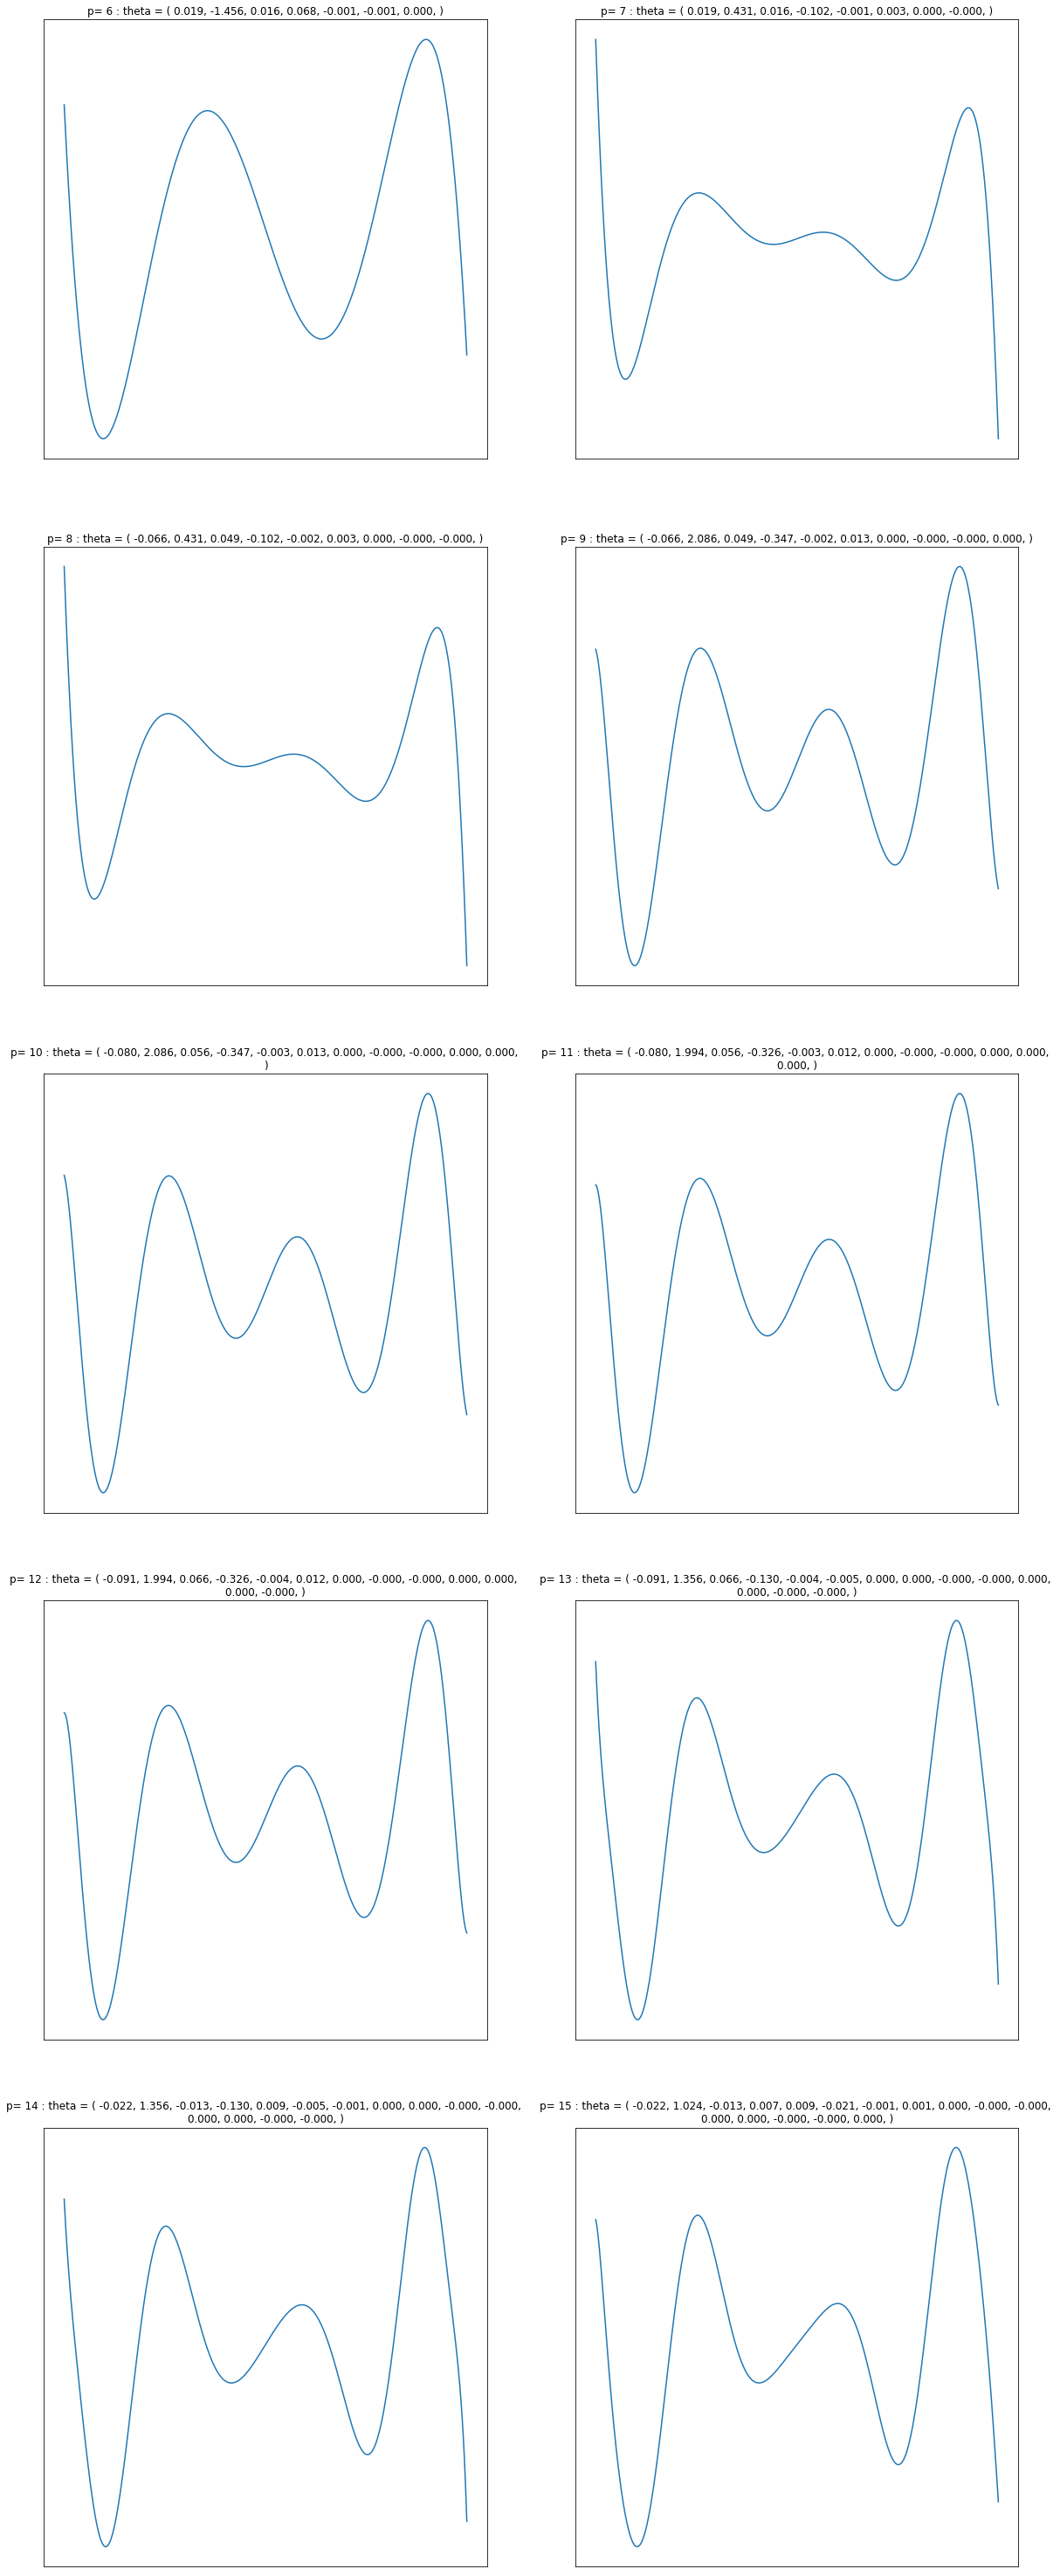

In [31]:
lamb_da = 12.5
fig = plt.figure(figsize=(20,60))
error = list()
clean_y =list()
titlelist= list()
first_p = 6
for i in range(10):
    plt.subplot(5, 2, i+1)
    
    A = makeA(i+first_p,lamb_da,x)
    noisy_y =y 
    numdata = np.shape(noisy_y)[0]
    transposednoisy_y = noisy_y.reshape((numdata, 1))
    b = makebold_b(transposednoisy_y,i+ first_p)
    ATA =np.matmul(A.T, A)
    invATA = inv(ATA)
    C = np.matmul(invATA, A.T)# C Matmul noise_ = theta_0, theta_1 , ... 
    thetavector = np.matmul(C,b)
    theEnergy = np.matmul(((np.matmul(A,thetavector))-b).T,
                      ((np.matmul(A,thetavector))-b))
    error.append(theEnergy[0][0])
    
    A_p = makeA_p(i+first_p,x)
    clean_y.append((np.matmul(A_p,thetavector)).reshape(-1,) ) # clean
    plt.plot(x, clean_y[i])
    title= "p= "+str(i+first_p)
    title+=" : theta = ( "
    for j in range(i+1+first_p):
        title+=str("{:.3f}".format (thetavector[j,0])) +", "
        if j==10:
            title+="\n"
    title+=")"
    titlelist.append(title)
    plt.title(title)
    fig.subplots_adjust(top=0.8)
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# ﬁtting the noisy data in polynomial  with varying p = 6,7,··· ,15 

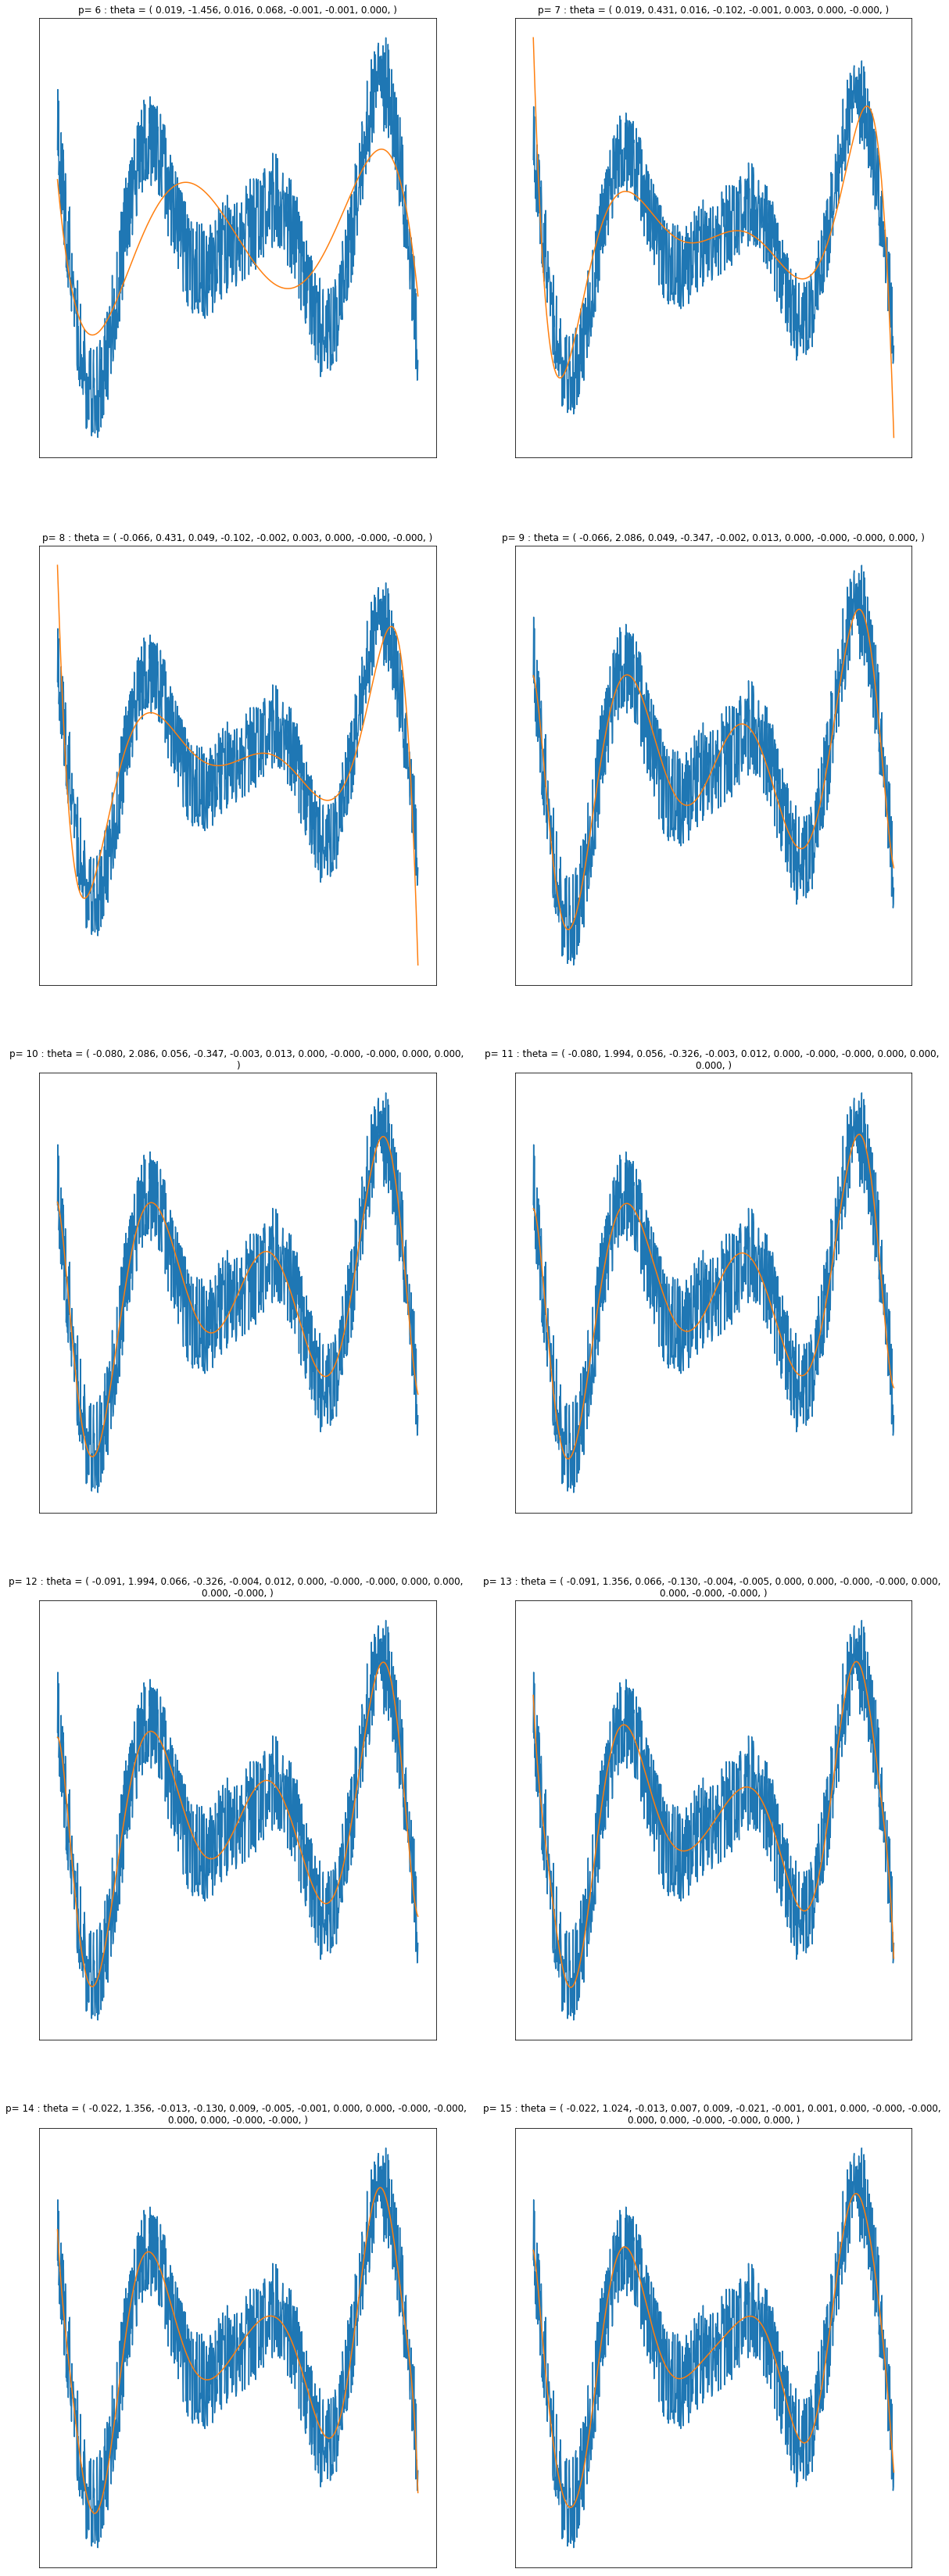

In [32]:
fig = plt.figure(figsize=(20,60))
for i in range(10):
    plt.subplot(5, 2, i+1)
    noisy_y =y 
    plt.plot(x,noisy_y)# noisy
    plt.plot(x, clean_y[i])#clean
    plt.title(titlelist[i])
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Plot the least square error with varing p =6,...,15 , lambda=12.5

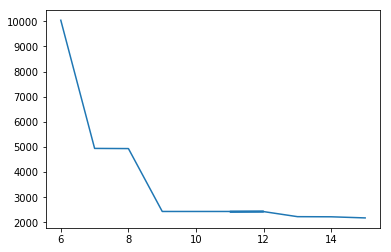

In [35]:
px = [6 ,7 ,8 ,9,12,11,12,13,14,15]
py = [error[0] , error[1],error[2],error[3],error[4],error[5],error[6],error[7],error[8],error[9]]
fig2 = plt.figure(2)
plt.plot(px,py ) #line fit
plt.show()

# print the least square error with varing p =6,...,15 , lambda=12.5

In [36]:
print("( ",end="")
for i in range(10):
    print("{:.5f}, ".format(py[i]),end="")
print(" )")

( 10037.86861, 4942.88793, 4936.33239, 2436.36318, 2436.19209, 2430.74395, 2430.61021, 2229.71895, 2224.64691, 2180.11224,  )


# Plot the polynomial curves with varying λ = 1/ 2^0 , 1/ 2^1 , 1/ 2^22 ,··· , 1 /2^k with ﬁxed p=15

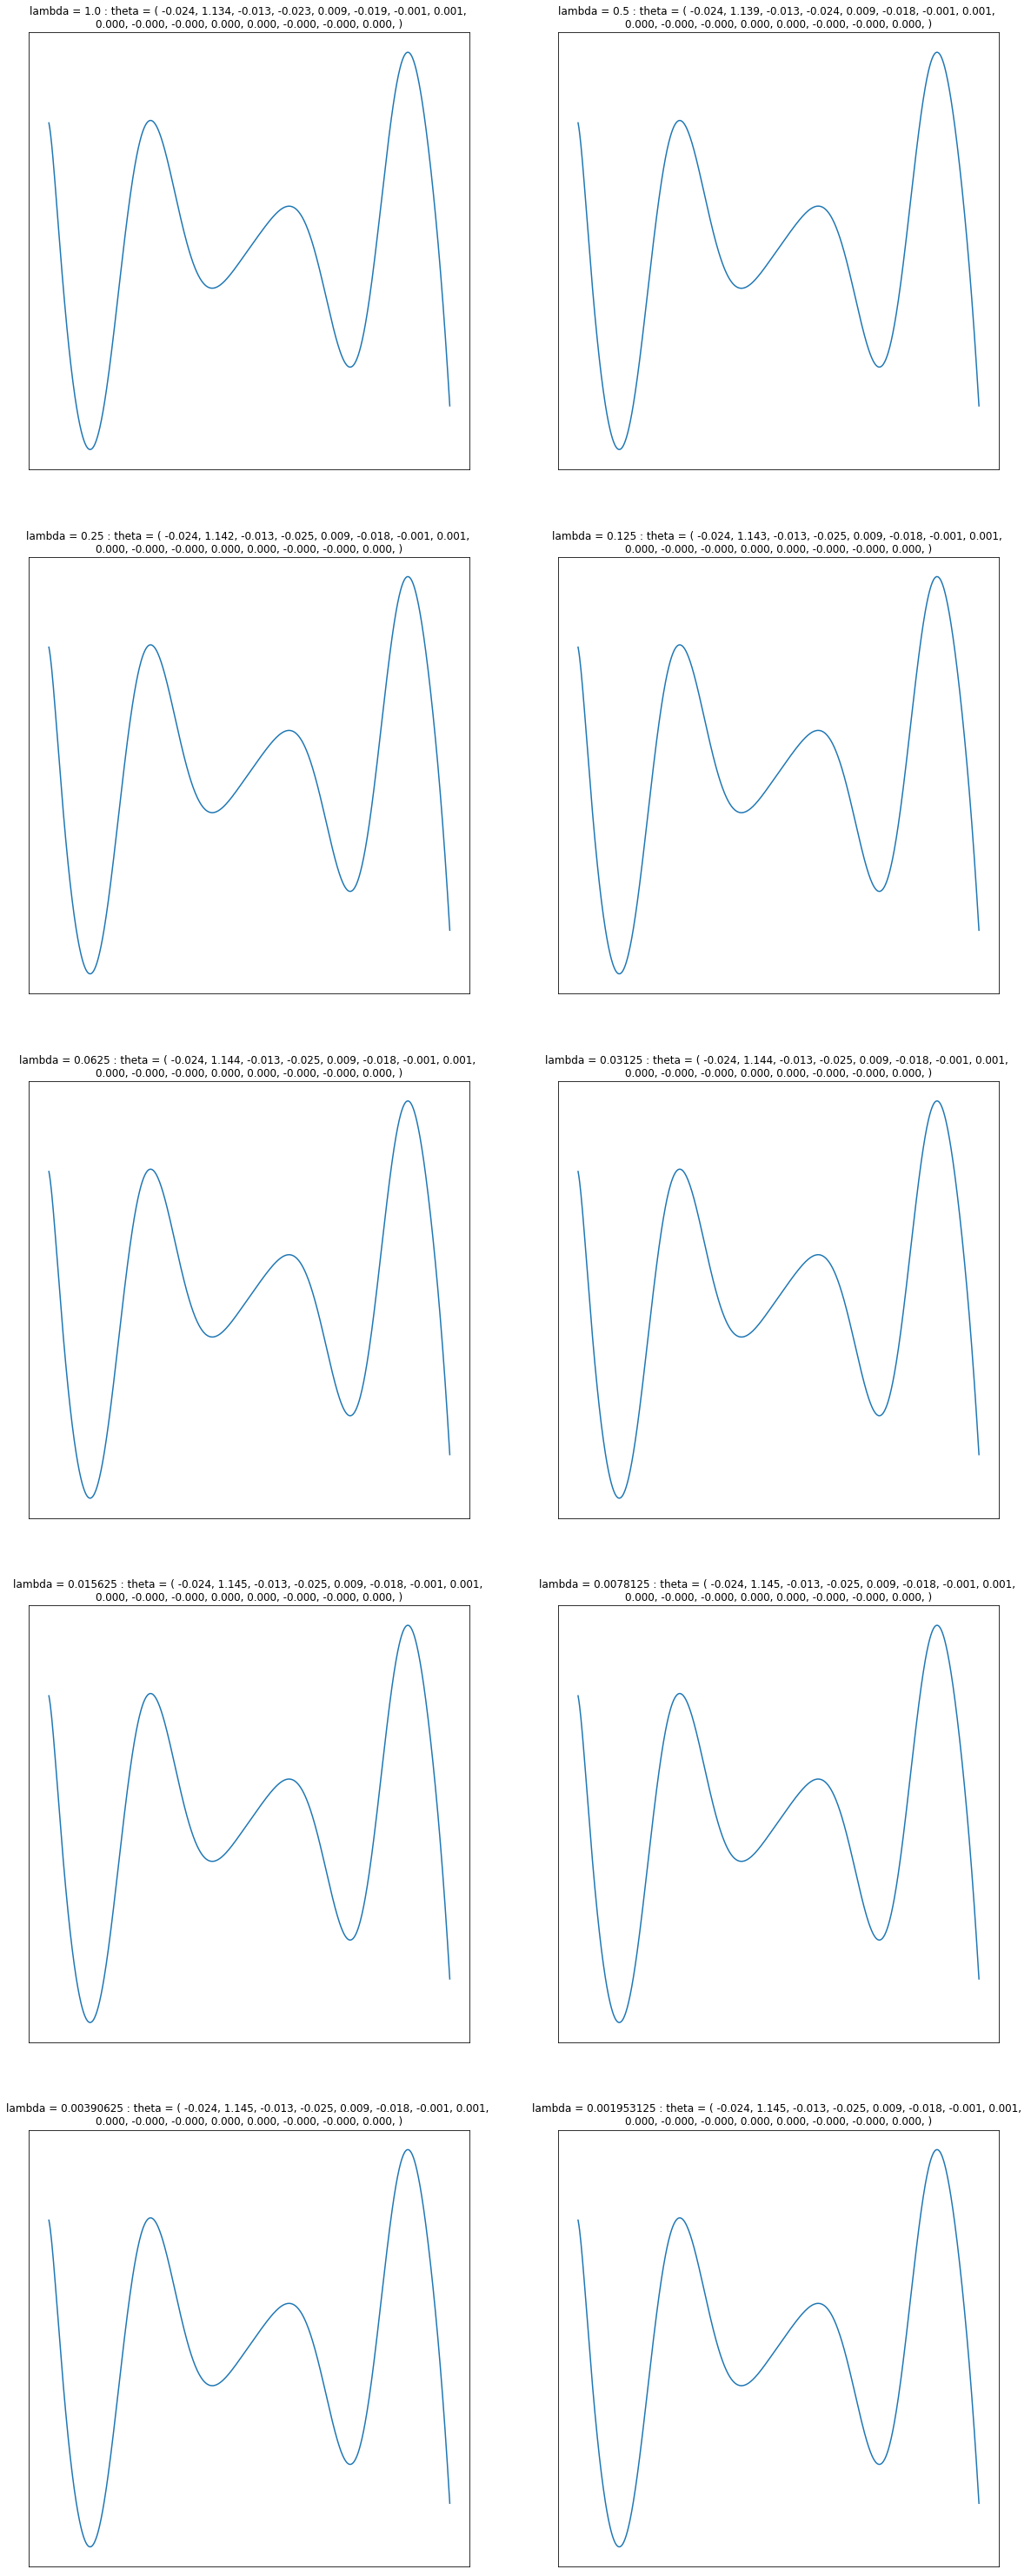

In [39]:
fixed_p = 15
fig = plt.figure(figsize=(20,60))
error = list()
clean_y =list()
titlelist= list()
for i in range(10):
    plt.subplot(5, 2, i+1)
    lamb_da = np.power(2.0,-i)
    A = makeA(fixed_p,lamb_da,x)
    noisy_y =y 
    numdata = np.shape(noisy_y)[0]
    transposednoisy_y = noisy_y.reshape((numdata, 1))
    b = makebold_b(transposednoisy_y,fixed_p)
    ATA =np.matmul(A.T, A)
    invATA = inv(ATA)
    C = np.matmul(invATA, A.T)# C Matmul noise_ = theta_0, theta_1 , ... 
    thetavector = np.matmul(C,b)
    theEnergy = np.matmul(((np.matmul(A,thetavector))-b).T,
                      ((np.matmul(A,thetavector))-b))
    error.append(theEnergy[0][0])
    
    A_p = makeA_p(fixed_p,x)
    clean_y.append((np.matmul(A_p,thetavector)).reshape(-1,) ) # clean
    plt.plot(x, clean_y[i])
    title = "lambda = "+str(lamb_da)
    title+=" : theta = ( "
    for j in range(1+fixed_p):
        title+=str("{:.3f}".format (thetavector[j,0])) +", "
        if j==7:
            title+="\n"
    title+=")"
    
    titlelist.append(title)
    plt.title(title)
    fig.subplots_adjust(top=0.8)
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# ﬁt the noisy data by the least square error with varing lambda ,p=15 

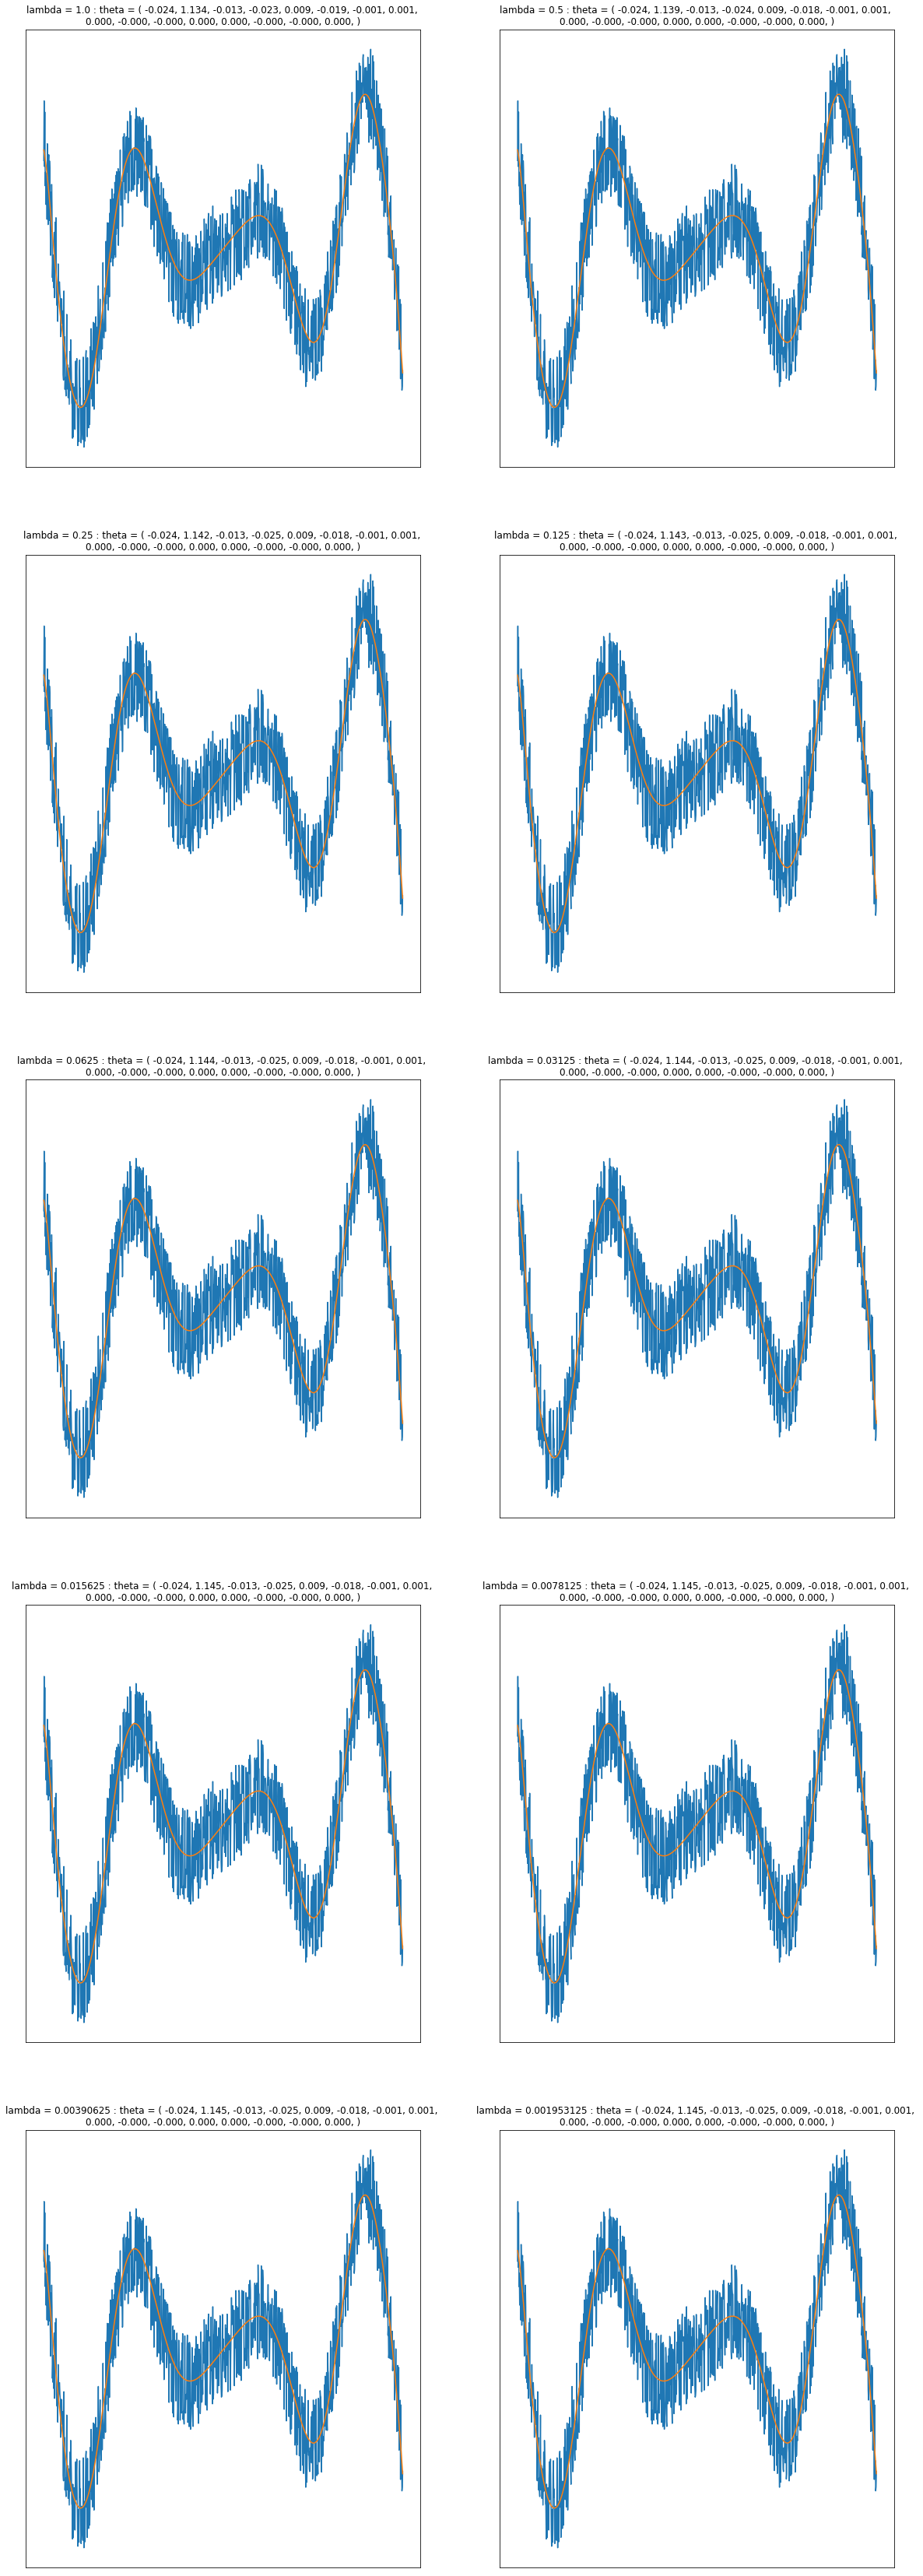

In [40]:
fig = plt.figure(figsize=(20,60))
for i in range(10):
    plt.subplot(5, 2, i+1)
    noisy_y =y 
    plt.plot(x,noisy_y)# noisy
    plt.plot(x, clean_y[i])#clean
    plt.title(titlelist[i])
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# plot the least square error with varing lambda , p = 15(fixed) 

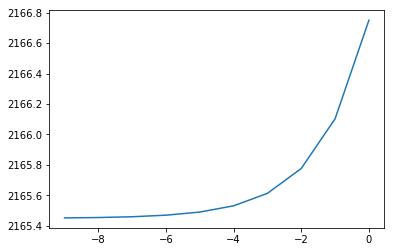

In [43]:
px = [0,-1,-2,-3,-4,-5,-6,-7,-8,-9]
py = [error[0] , error[1],error[2],error[3],error[4],error[5],error[6],error[7],error[8],error[9]]
fig2 = plt.figure(2)
plt.plot(px,py ) #line fit
plt.show()

# print error with varing lambda

In [45]:
print("( ",end="")
for i in reversed(range(10)):# I am meaninng to 2^-'9' , ... , 2^-'0'
    print("{:.5f}, ".format(py[i]),end="")
print(" )")

( 2165.45218, 2165.45474, 2165.45987, 2165.47012, 2165.49062, 2165.53159, 2165.61347, 2165.77694, 2166.10271, 2166.74961,  )
